In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [9]:
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
columns=inspector.get_columns('measurement')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [11]:
engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
start_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
start_date

('2017-08-23',)

#### Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query_date=dt.date(2017,8,23)-dt.timedelta(days=365)
print(query_date)



2016-08-23


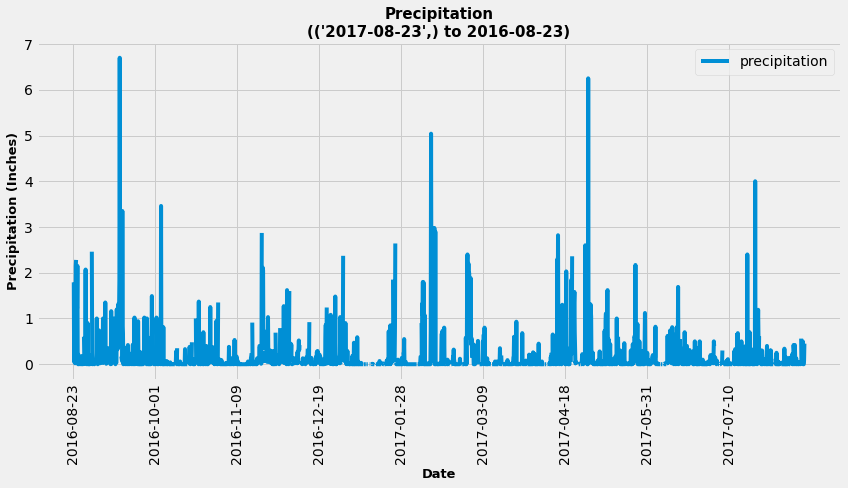

In [14]:
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipitation=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(precipitation,columns=['date','precipitation']).set_index('date')
df
# index_df=df.set_index('date',inplace=True)
sorted_df=df.sort_index()
prcp_12m= sorted_df.plot(kind='line', rot=90, figsize=(12,7), grid=True, use_index=False)

# Set xticks for plotting
index_date = sorted_df.index
list_date_index = [*range(len(index_date))]
date_tick = []
index = 0
interval = 250

while index < max(list_date_index):
    date_tick.append(index)
    index += interval

positions = np.arange(min(list_date_index), max(list_date_index)+1, 250)
labels = [index_date[d] for d in date_tick]
plt.xticks(positions, labels)

# Set x/y label, title
plt.title(f'Precipitation\n({start_date} to {query_date})', fontweight = 'bold', size=15)
plt.xlabel('Date', fontweight = 'bold', size=13)
plt.ylabel('Precipitation (Inches)', fontweight = 'bold', size=13)

plt.tight_layout()
plt.savefig('Image/prcp_12m.png')
# Present the chart
plt.show()
# To close pyplot
plt.close()


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_prcp=df.describe()
summary_prcp

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
engine.execute('SELECT * FROM Station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [17]:
columns=inspector.get_columns('station')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [18]:
# Design a query to calculate the total number stations in the dataset
total_station=session.query(Measurement.station).distinct().count()
print(f"There are {total_station} staions in the dataset")

There are 9 staions in the dataset


In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

('USC00519281', 2772)

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel=[Measurement.station,
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)]
tobs_active=session.query(*sel).filter(Measurement.station=='USC00519281').group_by(Measurement.station).\
             order_by(Measurement.station).all()
tobs_active_df=pd.DataFrame(tobs_active,columns=["Station ID","Lowest Temp","Highest Temp","Average Temp"])
tobs_active_df

,Station ID,Lowest Temp,Highest Temp,Average Temp
0,USC00519281,54.0,85.0,71.663781


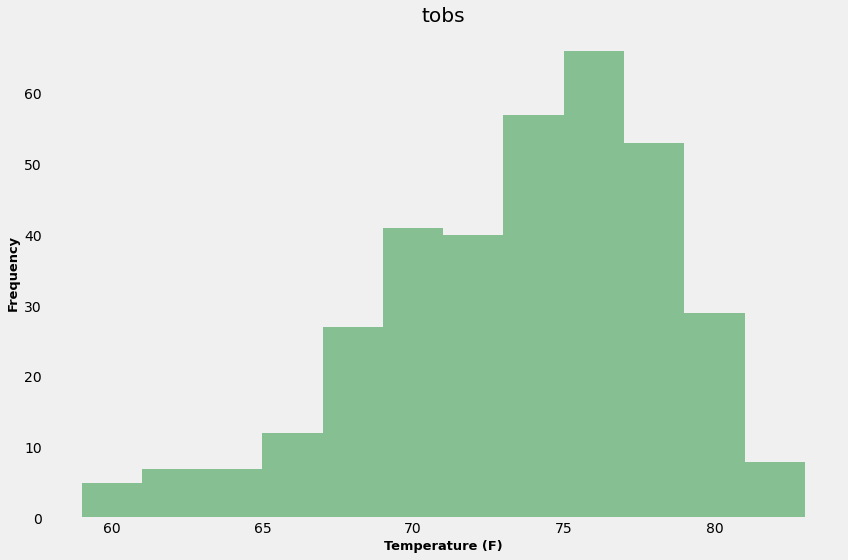

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_12m=session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date>=query_date).all()

tobs_df = pd.DataFrame(tobs_12m, columns=['tobs'])

ax = tobs_df.hist(bins=12, grid=False, figsize=(12,8), color='#86bf91', zorder=2)
plt.xlabel('Temperature (F)', fontweight = 'bold', size=13)
plt.ylabel('Frequency',fontweight = 'bold', size=13)
plt.tight_layout()
plt.savefig('Image/tobs_plot.png')
plt.show()
plt.close()

# Close session

In [22]:
# Close Session
session.close()